In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
import datetime

In [2]:
archi = '/eos/project/i/isolde-tisd/Data/Target 762-VD7/'

In [47]:
data = pd.read_csv(archi+'TIMBER_data3.csv')
data['dT']=pd.to_datetime(data['Timestamp (LOCAL_TIME)'] )
data['time']=(data['dT']-data['dT'][0]) / datetime.timedelta(seconds=1)
#data.set_index(['time'], inplace=True)

data.head(100)

,Timestamp (LOCAL_TIME),YOFFL2.FC110:LastAcq,YOFFL2.FC80:LastAcq,YOL2.ANODE1:_I_MEAS,YOL2.ANODE1:_U_MEAS,YOL2.ANODE2:_I_MEAS,YOL2.ANODE2:_U_MEAS,YOL2.OVEN2:_I_MEAS,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
0,2023-08-14 07:57:08.147,-1.220740e-14,-1.220740e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:08.147,0.000
1,2023-08-14 07:57:08.647,-1.220740e-14,-1.220740e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:08.647,0.500
2,2023-08-14 07:57:08.939,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:08.939,0.792
3,2023-08-14 07:57:09.147,-1.831110e-14,-1.220740e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:09.147,1.000
4,2023-08-14 07:57:09.647,-6.103700e-15,-6.103700e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:09.647,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-08-14 07:57:39.940,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:39.940,31.793
96,2023-08-14 07:57:40.149,-6.103700e-15,-1.220740e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:40.149,32.002
97,2023-08-14 07:57:40.649,-1.831110e-14,-1.220740e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-14 07:57:40.649,32.502
98,2023-08-14 07:57:40.940,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:40.940,32.793


In [91]:
for series in data.columns[1:11]:
    data[series].interpolate(method='values', inplace=True)
data.head(100)

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
0,2023-08-14 07:57:08.147,-1.220740e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:08.147,0.000
1,2023-08-14 07:57:08.647,-1.220740e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:08.647,0.500
2,2023-08-14 07:57:08.939,-1.525925e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:08.939,0.792
3,2023-08-14 07:57:09.147,-1.831110e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:09.147,1.000
4,2023-08-14 07:57:09.647,-6.103700e-15,-6.103700e-15,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:09.647,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-08-14 07:57:39.940,-9.155550e-15,-1.525925e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:39.940,31.793
96,2023-08-14 07:57:40.149,-6.103700e-15,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:40.149,32.002
97,2023-08-14 07:57:40.649,-1.831110e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:40.649,32.502
98,2023-08-14 07:57:40.940,-1.525925e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:40.940,32.793


In [92]:
#Manually change some values in the first row. Nan to an actual value that makes sense. 
first_row = data.head(1)
for i in first_row:
    data.loc[data[i] == 'NaN', i] =0

first_row

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
0,2023-08-14 07:57:08.147,-1.220740e-14,-1.220740e-14,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.000002,2023-08-14 07:57:08.147,0.0


In [93]:
#Filling the first rows with values that makes sense.
for col in data.columns[3:8]:
    data[col].replace(np.NaN, 0, inplace = True)

data['YOL2.OVEN2:_U_MEAS'] = data['YOL2.OVEN2:_U_MEAS'].replace(np.nan, 0.000004)
data['YOL2.TARGET:_I_MEAS'] = data['YOL2.TARGET:_I_MEAS'].replace(np.nan, 0.0)
data['YOL2.TARGET:_U_MEAS'] = data['YOL2.TARGET:_U_MEAS'].replace(np.nan, 0.000002 )
data

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
0,2023-08-14 07:57:08.147,-1.220740e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.147000,0.000
1,2023-08-14 07:57:08.647,-1.220740e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.647000,0.500
2,2023-08-14 07:57:08.939,-1.525925e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.939000,0.792
3,2023-08-14 07:57:09.147,-1.831110e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:09.147000,1.000
4,2023-08-14 07:57:09.647,-6.103700e-15,-6.103700e-15,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:09.647000,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036660,2023-08-18 07:57:06.588,1.129185e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:06.588000,345598.441
1036661,2023-08-18 07:57:06.861,1.098666e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:06.861000,345598.714
1036662,2023-08-18 07:57:07.361,1.159703e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:07.361000,345599.214
1036663,2023-08-18 07:57:07.588,1.159703e-13,-2.227850e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:07.588000,345599.441


In [94]:
data = data.rename( columns = {'YOFFL2.FC110:LastAcq': 'FC110_A', 'YOFFL2.FC80:LastAcq': 'FC80_A', 'YOL2.ANODE1:_U_MEAS': 'A1_V',
                               'YOL2.ANODE2:_U_MEAS' :'A2_V', 'YOL2.OVEN2:_I_MEAS':'Magnet_A' })

In [97]:
#Tuesday data. Analgo para otros dias.
start_date = pd.to_datetime('2023-08-15')
end_date = pd.to_datetime('2023-08-16')
#martes = data['dT'][(data['dT']>start_date) & (data['dT']< end_date)]
martes = data[(data['dT']>start_date) & (data['dT']< end_date)]
martes

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
173295,2023-08-15 00:00:00.444,6.103700e-15,-2.441480e-14,0.00000,124.65277,-0.002893,124.65277,-0.057877,0.000004,350.0,4.296875,2023-08-15 00:00:00.444000,57772.297
173296,2023-08-15 00:00:00.711,6.103700e-15,-2.136295e-14,0.00000,124.65277,-0.002893,124.65277,-0.057877,0.000004,350.0,4.296875,2023-08-15 00:00:00.711000,57772.564
173297,2023-08-15 00:00:00.944,6.103700e-15,-1.831110e-14,0.00000,124.65277,-0.002893,124.65277,-0.057877,0.000004,350.0,4.296875,2023-08-15 00:00:00.944000,57772.797
173298,2023-08-15 00:00:01.444,6.103700e-15,-1.831110e-14,0.00000,124.65277,-0.002893,124.65277,-0.057877,0.000004,350.0,4.296875,2023-08-15 00:00:01.444000,57773.297
173299,2023-08-15 00:00:01.711,0.000000e+00,-1.525925e-14,0.00000,124.65277,-0.002893,124.65277,-0.057877,0.000004,350.0,4.296875,2023-08-15 00:00:01.711000,57773.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432464,2023-08-15 23:59:58.616,4.119997e-10,-2.807702e-13,0.00868,124.65277,0.017361,174.47913,-0.057877,0.000004,400.0,5.217014,2023-08-15 23:59:58.616000,144170.469
432465,2023-08-15 23:59:58.883,4.121676e-10,-2.838220e-13,0.00868,124.65277,0.017361,174.47913,-0.057877,0.000004,400.0,5.217014,2023-08-15 23:59:58.883000,144170.736
432466,2023-08-15 23:59:59.116,4.123355e-10,-2.868739e-13,0.00868,124.65277,0.017361,174.47913,-0.057877,0.000004,400.0,5.217014,2023-08-15 23:59:59.116000,144170.969
432467,2023-08-15 23:59:59.616,4.122744e-10,-2.807702e-13,0.00868,124.65277,0.017361,174.47913,-0.057877,0.000004,400.0,5.217014,2023-08-15 23:59:59.616000,144171.469


In [100]:
m1 = martes.loc[(martes['A1_V'] == 124.65277) & martes['A2_V']>= 124.65277]
m1

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time


In [101]:
#When fixing Anode 2 voltage to 100 V. 
d1 = data.loc[(data['A2_V'] >= 99) & (data['A2_V'] <= 100)] 
d1

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,A1_V,YOL2.ANODE2:_I_MEAS,A2_V,Magnet_A,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT,time
48420,2023-08-14 12:26:10.705,-9.155550e-15,-1.525925e-14,0.00000,99.652770,-0.002893,99.652770,-0.057877,0.000004,0.000000,0.000002,2023-08-14 12:26:10.705000,16142.558
48421,2023-08-14 12:26:10.931,-1.220740e-14,-1.220740e-14,0.00000,99.652770,-0.002893,99.652770,-0.057877,0.000004,-0.154338,0.000002,2023-08-14 12:26:10.931000,16142.784
48422,2023-08-14 12:26:11.431,-1.831110e-14,-2.441480e-14,0.00000,99.652770,-0.002893,99.652770,-0.057877,0.000004,-0.308675,0.000002,2023-08-14 12:26:11.431000,16143.284
48423,2023-08-14 12:26:11.705,-1.525925e-14,-1.831110e-14,0.00000,99.652770,-0.002893,99.652770,-0.057877,0.000004,-0.463013,0.000002,2023-08-14 12:26:11.705000,16143.558
48424,2023-08-14 12:26:11.931,-1.220740e-14,-1.220740e-14,0.00000,99.652770,-0.002893,99.652770,-0.057877,0.000004,-0.463013,0.000002,2023-08-14 12:26:11.931000,16143.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882964,2023-08-17 17:43:03.890,4.882960e-14,2.194426e-07,0.00868,79.513855,0.023148,99.826355,5.555557,23.518521,400.000000,5.217014,2023-08-17 17:43:03.890000,294355.743
882965,2023-08-17 17:43:04.104,4.272590e-14,2.194960e-07,0.00868,79.513855,0.023148,99.826355,5.555557,23.524307,400.000000,5.217014,2023-08-17 17:43:04.104000,294355.957
882966,2023-08-17 17:43:04.390,3.662220e-14,2.195494e-07,0.00868,79.513855,0.023148,99.826355,5.555557,23.518521,400.000000,5.217014,2023-08-17 17:43:04.390000,294356.243
882967,2023-08-17 17:43:04.890,3.662220e-14,2.193815e-07,0.00868,79.513855,0.023148,99.826355,5.555557,23.512736,400.000000,5.217014,2023-08-17 17:43:04.890000,294356.743


In [70]:
d1['A2_V'][0:1]

48420    99.65277
Name: A2_V, dtype: float64

In [36]:
d1.iloc[0:100,6]

time
16142.558    99.65277
16142.784    99.65277
16143.284    99.65277
16143.558    99.65277
16143.784    99.65277
               ...   
16174.285    99.65277
16174.560    99.65277
16174.785    99.65277
16175.285    99.65277
16175.560    99.65277
Name: A2_V, Length: 100, dtype: float64

,Timestamp (LOCAL_TIME),FC110_A,FC80_A,YOL2.ANODE1:_I_MEAS,AnodeBody_V,YOL2.ANODE2:_I_MEAS,Grid_V,Magnet_,YOL2.OVEN2:_U_MEAS,YOL2.TARGET:_I_MEAS,YOL2.TARGET:_U_MEAS,dT
time,,,,,,,,,,,,
0.000,2023-08-14 07:57:08.147,-1.220740e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.147
0.500,2023-08-14 07:57:08.647,-1.220740e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.647
0.792,2023-08-14 07:57:08.939,-1.577196e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:08.939
1.000,2023-08-14 07:57:09.147,-1.831110e-14,-1.220740e-14,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:09.147
1.500,2023-08-14 07:57:09.647,-6.103700e-15,-6.103700e-15,0.00000,0.00000,0.000000,0.00000,0.000000,0.000004,0.0,0.000002,2023-08-14 07:57:09.647
...,...,...,...,...,...,...,...,...,...,...,...,...
345598.441,2023-08-18 07:57:06.588,1.131992e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:06.588
345598.714,2023-08-18 07:57:06.861,1.098666e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:06.861
345599.214,2023-08-18 07:57:07.361,1.159703e-13,-2.197332e-13,0.00868,99.65277,0.034722,199.65277,3.587967,13.194450,400.0,5.208336,2023-08-18 07:57:07.361


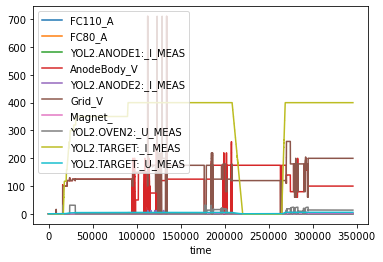

In [104]:
data.drop(columns=['Timestamp (LOCAL_TIME)','dT']).plot()
data